# Assignment 4 - Unsupervised Learning and Neural Networks

## *Ravitashaw Bathla*
Netid: rb369

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

# Learning objectives
Through completing this assignment you will be able to...
1. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters.
2. Apply PCA and t-SNE for performing dimensionality reduction and data visualization
3. Understand how PCA represents data in lower dimensions and understand the concept of data compression.
4. Build, tune the parameters of, and apply feedforward neural networks to data
5. Develop a detailed understanding of the math and practical implementation considerations of neural networks, one of the most widely used machine learning tools.

## 1

### [35 points] Clustering

**Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience building a basic clustering algorithm to provide insight into the structure of these techniques, then compare a number of clustering techniques on a distinctive datasets to experience the pros and cons of these approaches.**

**(a) Implement your own k-means algorithm. For a measure of dissimilarity use the sum of squared error of the Euclidean distance from each point to the cluster mean. Initialize your means by selecting a set of $k$ points at random from your dataset and using those values as the initial means. You may need to run your algorithm multiple times with different initializations (picking the clustering with the lower dissimilarity measure) to get the best results. You may use the template below to assist you in your implementation.**

**ANSWER**

In [241]:
import numpy as np

def kmeans(X, k, max_steps=50, convergence_threshold=0.001, random_state=1454):
    #initlialize centroids
    centroids = initalize_centroids(X, k, random_state)
    cluster_assignment = np.zeros(X.shape[0])
    
    for step in range(max_steps):
        old_centroids = centroids

        #calculate distance from each centroid
        distance = calculate_distance(X, k, centroids)
        #assign clusters for each row based upon distance calculated
        cluster_assignment = get_cluster_assignment(X, distance, centroids)
        #calculate new centroids by taking mean of all the points in that cluster
        centroids = update_centroids(X, k, cluster_assignment)
        
        #if convergence threshold is greater than a value,break the loop
        if convergence_threshold==np.linalg.norm(old_centroids-centroids):
            break
        diss = calculate_dissimilarity(X, k, centroids, cluster_assignment)
    return cluster_assignment, centroids, diss

def calculate_dissimilarity(X, k, centroids, cluster_assignment):
    diss = np.zeros(X.shape[0])
    for c in range(k):
        diss[cluster_assignment==c] = np.linalg.norm(X[cluster_assignment==c]-centroids[c], axis=1)
        #print(diss)
    return np.sum(diss)
    
def calculate_distance(X, k, centroids):
    distance = np.zeros((X.shape[0], k))
    #print(centroids)
    for c in range(k):
        distance[:, c] = np.linalg.norm(X-centroids[c,:], axis=1)
    #print(distance)
    return distance
     
def get_cluster_assignment(X, distance, centroids):
    cluster_assignment = np.zeros(X.shape[0])
    cluster_assignment = np.argmin(distance, axis=1)
    return cluster_assignment
    
def initalize_centroids(X, k, random_state=123):
    np.random.RandomState(random_state)
    random_idx = np.random.permutation(X.shape[0])
    centroids = X[random_idx[:k]]
    return centroids

def update_centroids(X, k, cluster_assignment):
    centroids = np.zeros((k, X.shape[1]))
    for c in range(k):
        centroids[c,:] = np.mean(X[cluster_assignment==c, :], axis=0)
    return centroids

In [34]:
#a = np.array([[1,2,1,2], [7,7,8,7], [0,2,2,1], [8,7,7,8]])
#kmeans(a, 2)

**(b) Demo your algorithm. Create some data to cluster by using the `blobs` module from `scikit-learn` to construct two datasets: one with 2 cluster centers and the other with 5. Set the `random_state` keyword parameter to 0 in each to ensure the datasets are consistent with the rest of the class and generate 5,000 samples of each dataset. For each dataset rerun your k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. For your two datasets, where is the elbow in the curve and why? Plot the data and your $k$-means for the optimal value of $k$ that you determined from the elbow curve.**

In [247]:
from sklearn import datasets

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

centers_2 = [(0,0),(6,0)]
centers_5 = [(0,0),(7,0),(0,6),(6,8),(4,5)]

two_cluster_dataset, _ = datasets.make_blobs(n_samples=5000, n_features=2, centers=centers_2,cluster_std=1.0,random_state=0)
five_cluster_dataset, _ = datasets.make_blobs(n_samples=5000, n_features=2, centers=centers_5,cluster_std=1.0, random_state=0)

def plot_diss(dataset, k_cl):
    dissimilarities = []
    for k in range(1, 11):
        _,_,diss = kmeans(dataset, k)
        dissimilarities.append(diss)
        
    fig = plt.figure()
    ax = plt.axes()

    x = np.linspace(0, 11, 10)
    plt.plot(x, dissimilarities)
    plt.title("Elbow curve for the blobs data set with k={}".format(k_cl))
    plt.ylabel('Dissimilarity')
    plt.xlabel('k clusters')
    plt.show();
    return

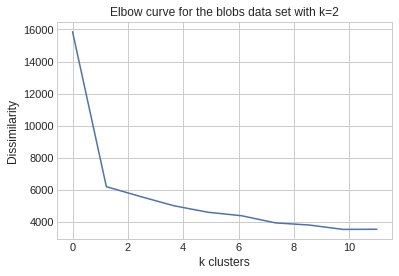

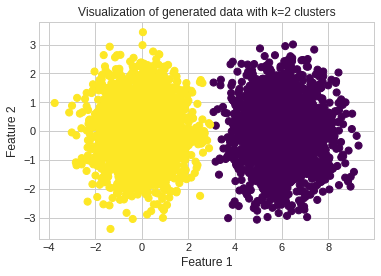

In [248]:
plot_diss(two_cluster_dataset, 2);
two_cluster_assignment,two_centroids,_ = kmeans(two_cluster_dataset, 2);

plt.scatter(two_cluster_dataset[:,0], two_cluster_dataset[:,1], c=two_cluster_assignment, s=50, cmap='viridis');
plt.title("Visualization of generated data with k=2 clusters")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

Based upon the elbow curve for the dataset with k=2 clusters, it can be observed that there seems to be approximately cluster (steepest elbow). The visualization of the data is shown above and it can be fairly conculded that the two clusters are clearly separated, therefore the observation of steepest bend being observed at k=2 on the elbow curve seems correct. 

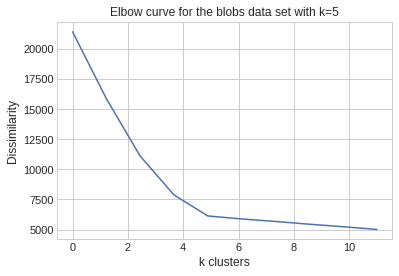

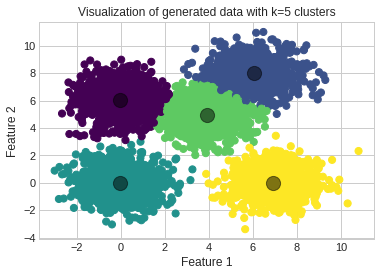

In [249]:
plot_diss(five_cluster_dataset, 5)
five_cluster_assignment,five_centroids,_ = kmeans(five_cluster_dataset, 5)

plt.scatter(five_cluster_dataset[:,0], five_cluster_dataset[:,1], c=five_cluster_assignment, s=50, cmap='viridis');
plt.scatter(five_centroids[:,0], five_centroids[:,1], c='black', s=200, alpha=0.5);
plt.title("Visualization of generated data with k=5 clusters")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

The elbow curve for the dataset with k=5 clusters is partially esimating the number of clusters on observing the elbow plot. There are two steep bends in the curve, one is observed at around k=4 and another one is observed at k=6. On visualzing the data, it can be observed that there are four main clusters. The data was plotted with estimated k=4 clusters as shown below and on comparision the two, the representation with k=4 shows better clustering. It can be a drawback of k-means since the sole identifier of cluster for points is euclidean distance, so even if the point belongs to different cluster it might be observed in another cluster (for instance a few purple points seems to belong to yellow cluster, but are classfied otherwise). 

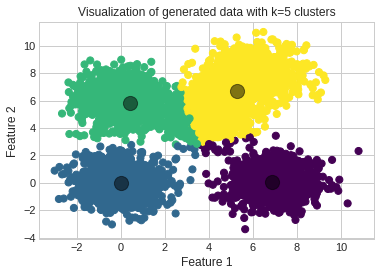

In [254]:
five_cluster_assignment,five_centroids,_ = kmeans(five_cluster_dataset, 4)

plt.scatter(five_cluster_dataset[:,0], five_cluster_dataset[:,1], c=five_cluster_assignment, s=50, cmap='viridis');
plt.scatter(five_centroids[:,0], five_centroids[:,1], c='black', s=200, alpha=0.5);
plt.title("Visualization of generated data with k=5 clusters")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

**(c) Ensure your understanding of how clustering methods work. Briefly explain in 1-2 sentences each (at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering.**

**ANSWER**

(1) K-means: In this unsupervised clustering technique, k centroids (or mediod) are initialized and the distance of all the points are calculated from the initialized centroids. The process is repeated and the centroids are updated after every step until convergence or a specified number of max steps.  The resulting centroids represents the center of the k clusters.

(2) Agglomerative Clustering: This is also an unsupervised clustering technique, however in this technique a bottom-up approach is followed. Each point is considered as an individual cluster and distance between each point is calculated. The closest points are merged together in one cluster and this process is repeated until all the points are covered (or only one cluster is left). A cut-off point is determined in the tree depending upon the number of clusters.

(3) Gaussian Mixture Models: It is a probabilistic approach to unsupervised clustering. The number of clusters are choosen, however instead of labelling each cluster as total ownership as in k-means, a probability is assigned for each datapoint correspoinding to all the clusters. The underlying distribution is assumed as Guassian and mean and covariance are calculated using EM algorithm with probabilistic clustering.

(4) DBSCAN: In this algorithm, a radius is defined for each cluster from each datapoint's center. There are three type of points, the inside point, outside point and on-the circle points. The datapoints are clustered together which are within the specified radius, the new center is updated and this process is repeated until all the points are classified into clusters. This method is outlier-proof. 

(5) Spectral Clustering: This algorithm works by creating a graph of the datapoints and its corresponding Laplacian matrix, computing eigenvectors of the Laplacian matrix, and then running k-means to separate the classes. By projecting the data onto a lower dimension, spectral clustering can often outperform k-means and other clustering algorithms in certain situations.

**(d) Apply clustering algorithms to diverse datasets. For each of the clustering algorithms in (c) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance for each dataset. Plot the final result as a 4-by-5 subplot showing the resulting clustering of each method on each dataset. Which method works best or worst on each dataset and why? (This can be 1-2 sentences for each dataset). The datasets are:**
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

*Note: for k-means, use the `scikit-learn` module rather than your own* 

**ANSWER**

In [236]:
import pandas as pd

aggregation = pd.read_csv('./data/Aggregation.txt', sep='\t' ,header=None)
compound = pd.read_csv('./data/Compound.txt', sep='\t', header=None)
d31 = pd.read_csv('./data/D31.txt', sep='\t', header=None)
jain = pd.read_csv('./data/jain.txt', sep='\t', header=None)

aggregation = aggregation.drop(2, axis=1)
compound = compound.drop(2, axis=1)
d31 = d31.drop(2, axis=1)
jain = jain.drop(2, axis=1)

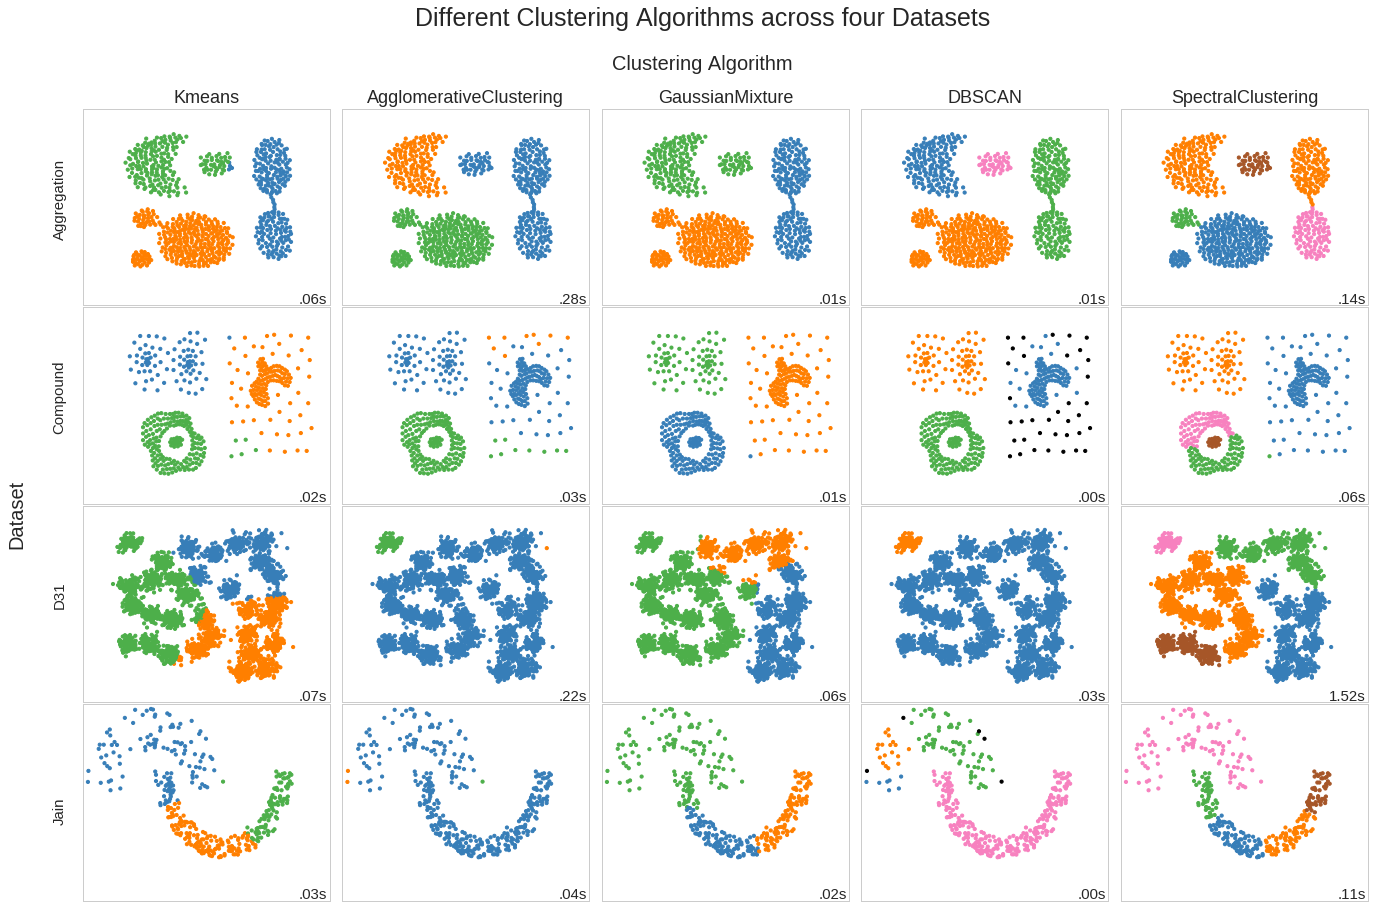

In [240]:
## Reference from Scikit official documentation for plotting and comparing datasets with different algorithms
##https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
import time
import warnings
from sklearn import cluster, mixture
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

fig = plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=0.05, right=0.9, bottom=0.02, top=0.9, wspace=.05,
                    hspace=.01)

plot_num = 1

datasets = [
    (aggregation),
    (compound),
    (d31),
    (jain)]

default_base = {'quantile': .3,
            'eps': .3,
            'n_neighbors': 10,
            'n_clusters': 3}
    
for i_dataset, (dataset) in enumerate(datasets):

    X = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=default_base['quantile'])
    
    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=default_base['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # Create cluster objects
    kmeans = KMeans(n_clusters=default_base['n_clusters'], random_state=0)
    agg_clustering = cluster.AgglomerativeClustering(linkage="average", affinity="cityblock", n_clusters=default_base['n_clusters'], connectivity=connectivity)
    gmm = mixture.GaussianMixture(n_components=default_base['n_clusters'], covariance_type='full')
    dbscan = cluster.DBSCAN(eps=default_base['eps'])
    spectral = cluster.SpectralClustering(n_clusters=5, eigen_solver='arpack',affinity="nearest_neighbors")

    clustering_algorithms = (
        ('Kmeans', kmeans),
        ('AgglomerativeClustering', agg_clustering),
        ('GaussianMixture', gmm),
        ('DBSCAN', dbscan),
        ('SpectralClustering', spectral),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

fig.text(0.03, 0.12, 'Jain', va='center', rotation='vertical', fontsize=15)
fig.text(0.03, 0.36, 'D31', va='center', rotation='vertical', fontsize=15)
fig.text(0.03, 0.58, 'Compound', va='center', rotation='vertical', fontsize=15)
fig.text(0.03, 0.80, 'Aggregation', va='center', rotation='vertical', fontsize=15)
fig.text(0.27, 1, 'Different Clustering Algorithms across four Datasets', va='center', rotation='horizontal', fontsize=25)
fig.text(0.4, .95, 'Clustering Algorithm', va='center', rotation='horizontal', fontsize=20)
fig.text(0,.45, 'Dataset', va='center', rotation='vertical', fontsize=20)
plt.show()

## Performance

**Aggregation** : DBSCAN seems to work best for this dataset followed by Agglomerative Clustering. The number of clusters seems more concise from DBSCAN in comparision to others as it is more susceptible to handling outliers. 

**Compound** : the Gaussian mixture model seems to work the best. GMM is a probabilistic model so considering the bizzarre distribution of datapoints, GMM has performed the best. K-means was close enough but since K-means provides concrete membership, GMM has performed better by labelling only one point (far lower left in right cluster) separately. 

**D31**: DBSCAN and Agglomerative Clustering have similar best performance. Both of these algorithms are good in identifying outlier cluster apart from the main big cluster using bottom-up approach. 

**Jain**: Spectral Clustering seems to perform the best with clear separation of the two main clusters. The number of clusters in Spectral has been set as 3, so there is a within separation in one of the clusters. In addition, k-means and GMM model performs decent with number of clusters as 3. However, these two models have categorized the head of the lower cluster with the head of upper cluster. Therefore, Spectral Clustering performance can be portrayed as best.

## 2

### [20 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a) Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).**

**ANSWER**

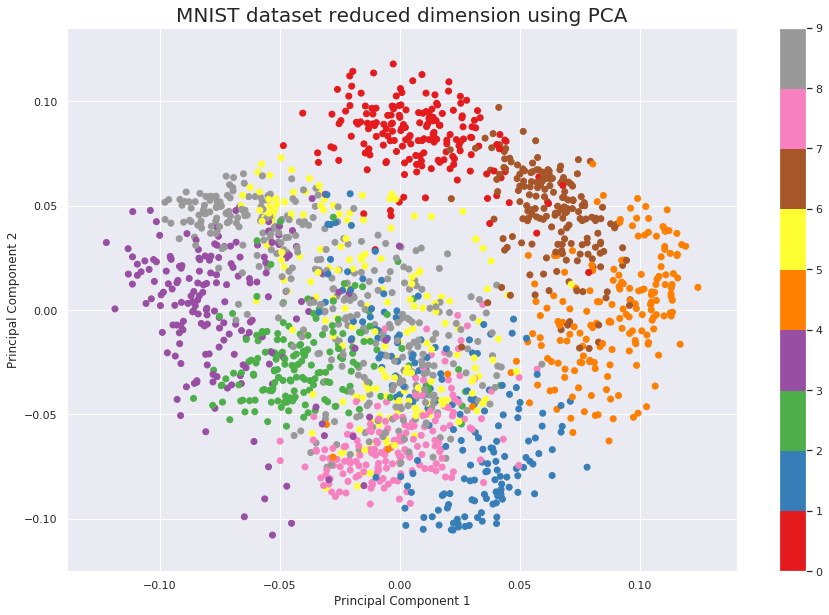

In [204]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import pandas as pd

mnist = load_digits()
X = mnist.data / 255.0
y = mnist.target

df = pd.DataFrame(X)

pca = PCA(n_components=2)
result = pca.fit_transform(df.values)

# Plot
plt.figure(figsize=(15,10))
plt.scatter(result[:,0], result[:,1], c=y, cmap='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST dataset reduced dimension using PCA', fontsize=20)
plt.colorbar()

**(b) Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? Briefly comment on how this may impact how well-clustered the data are. *You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question**

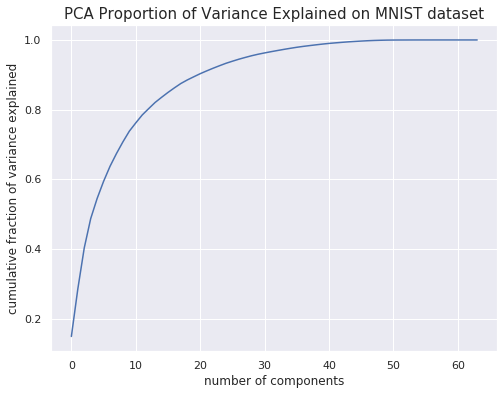

In [205]:
pca = PCA().fit(df.values)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA Proportion of Variance Explained on MNIST dataset', fontsize=15)
plt.xlabel('number of components')
plt.ylabel('cumulative fraction of variance explained');

In [64]:
np.sum(pca.explained_variance_ratio_[:2])

0.2850936482369929

Fraction of Variance explained by first two principal components = 0.2850. **Therefore, the fraction of variance UNEXPLAINED by the first two principal components is 1-0.285 = 0.71.5 or 71.5%**

On observing the actual images of numbers, it can be seen that these two principal components are not very precisely classifying the images. This is also justified by the Explained Variance which is very low. Also, the clusters in the above picture are not clearly separated. A user can slightly distinguish between clusters for digits 0, 1 and 4. ON the other hand, it is not difficult to classify the other digits from these two principal components. It can be concluded that more number of Principal components will be required to clearly classify all the digits. 

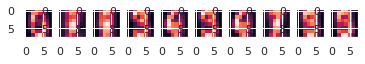

In [212]:
pca = PCA(n_components=2)
result = pca.fit_transform(df.values)

imgages = pca.inverse_transform(result)  

for i in range(10):
    plt.subplot(1,10, i + 1)
    plt.imshow(imgages[i].reshape(8,8))

**(c) Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).**

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.425s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.048776
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.065109
[t-SNE] KL divergence after 300 iterations: 0.931472


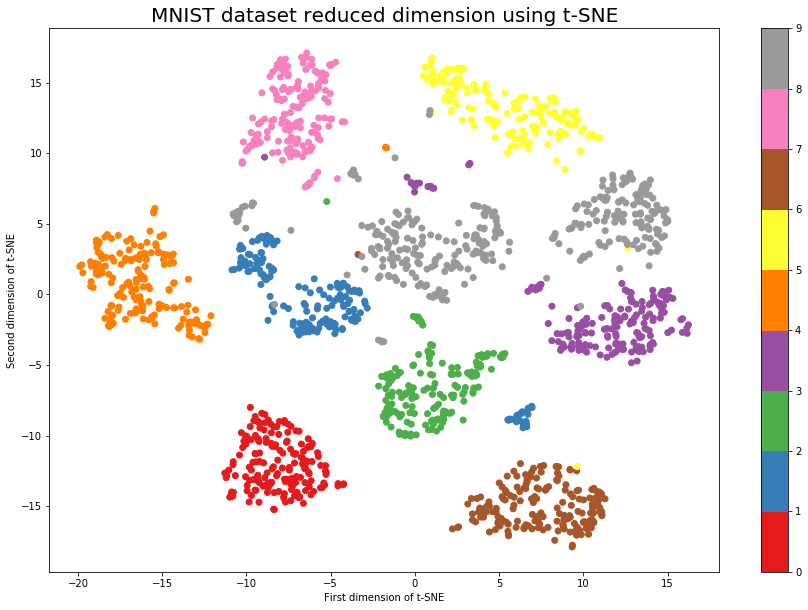

In [69]:
from sklearn.manifold import TSNE

df = pd.DataFrame(X)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
results = tsne.fit_transform(df.values)

plt.figure(figsize=(15,10))
plt.scatter(results[:,0], results[:,1], c=y, cmap='Set1')
plt.xlabel('First dimension of t-SNE')
plt.ylabel('Second dimension of t-SNE')
plt.title('MNIST dataset reduced dimension using t-SNE', fontsize=20)
plt.colorbar();

**(d) Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.**

**ANSWER**

It can be clearly observed from the t-SNE plot that the t-SNE is performing much better with respect to PCA. The points in t_SNE are clearly separable without any overlapping boundary. On the other hand, in PCA the classification boundary was almost unidentifiable for a majority of the MNIST digits. Therefore, for this problem it can be said that t-SNE performs better on this dataset with the specified configuration of 2 principal components. 


## 3

### [45 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier. You may use numpy if you wish but no other libraries.

**(a) Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.**

To guide you in the right direction with this problem, please find a skeleton of a neural network class below. You absolutely MAY use additional methods beyond those suggested in this template, but I see these methods as the minimum required to implement the model cleanly.

One of the greatest challenges of this implementations is that there are many parts and a bug could be present in any of them. I would strongly encourage you to create unit tests for most modules. Without doing this will make your code extremely difficult to bug. You can create simple examples to feed through the network to validate it is correctly computing activations and node values. Also, if you manually set the weights of the model, you can even calculate backpropagation by hand for some simple examples (admittedly, that unit test would be challenging, but a unit test is possible). You can also verify the performance of your overall neural network by comparing it against the `scikit-learn` implementation and using the same architecture and parameters as your model.

**ANSWER**

In [152]:
import numpy as np

class myNeuralNetwork(object):
    
    def __init__(self, n_in, n_layer1, n_layer2, n_out, learning_rate=0.01, random_state=123):
        self.n_in = n_in
        self.n_layer1 = n_layer1
        self.n_layer2 = n_layer2
        self.n_out = n_out
        self.learning_rate = learning_rate
        np.random.seed(random_state)

        #Neural Network Weights
        self.w1 = np.random.normal(loc=0, scale=1, size=(self.n_in, self.n_layer1))
        self.w2 = np.random.normal(loc=0, scale=1, size=(self.n_layer1, self.n_layer2))
        self.w3 = np.random.normal(loc=0, scale=1, size=(self.n_layer2, self.n_out))
        
        #Placeholder for layer output
        #a = wX, z=sigmoid(a)
        self.a1 = None
        self.a2 = None
        self.a3 = None
        
        #derivatives across layers
        #dE/da
        self.delta1 = None
        self.delta2 = None
        self.delta3 = None

        #sigmoid as activation
        self.activation = self.sigmoid
        
        #MSE as loss function
        self.cost_function = self.compute_loss
        self.y_hat = None
            
    def forward_propagation(self, x):
        #Layer1
        self.a1 = np.matmul(x, self.w1)
        self.z1 = self.activation(self.a1)
        #Layer2
        self.a2 = np.matmul(self.z1, self.w2)
        self.z2 = self.activation(self.a2)
        #Layer3
        self.a3 = np.matmul(self.z2, self.w3)
        self.z3 = self.activation(self.a3)
        self.y_hat_i = self.z3
        return self.y_hat_i
    
    def backpropagate(self, x, y):
        #From layer 3 to 2
        y_hat = self.y_hat_i #1x1
        
        #From Output layer (layer3) to layer2
        dE_dz3 = y-y_hat #1x1
        dz3_da3 = self.sigmoid_derivative(self.a3) #1x1
        self.delta3 = dE_dz3 * dz3_da3 #1x1
        self.dE_dw3 =  np.dot(self.z2.T,self.delta3) #(5x1)x(1x1)=5x1
        
        #From layer2 to layer1
        da3_dz2 = self.w3.T #(1x5)
        dE_dz2 =  np.dot(self.delta3,da3_dz2) # (1x1)x(1x5)=1x5
        dz2_da2 = self.sigmoid_derivative(self.a2) #1x5
        self.delta2 = dE_dz2 * dz2_da2 #1x5
        self.dE_dw2 = np.dot(self.z1.T, self.delta2)#(5x1)x(1x5) =5x5
        
        #From layer1 to input
        da2_dz1 = self.w2.T #5x5
        dE_dz1 = np.dot(self.delta2,da2_dz1) #(1x5)x(5x5)=1x5
        dz1_da1 = self.sigmoid_derivative(self.a1) #1x5
        self.delta1 = dE_dz1 * dz1_da1 #1x5
        self.dE_dw1 = np.dot(x.T, self.delta1) #(2x1)x(1x5)=2x5
        
        self.stochastic_gradient_descent_step()
        
        loss = self.compute_loss(x, y)
        return loss
            
    def stochastic_gradient_descent_step(self):
        self.w3 = self.w3 + self.learning_rate * self.dE_dw3
        self.w2 = self.w2 + self.learning_rate * self.dE_dw2
        self.w1 = self.w1 + self.learning_rate * self.dE_dw1
    
    def compute_loss(self, X, y):
        p = self.predict_proba(X)
        #only one output layer, so using mean square error
        total_loss = 0.5*np.sum(np.square(y-p))
        return total_loss
        

    def fit(self, X, y, X_val, y_val, max_epochs=100, learning_rate=0.01, get_validation_loss=True):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        
        training_loss = [0] * max_epochs
        validation_loss = [0] * max_epochs
        
        #splits the data into 10 percent validation for get_validation_loss = True and X_val and y_val not provided
        validation_size = int(0.1 * X.shape[0])
        if get_validation_loss and X_val is None and Y_val is None:
            X_train = X[validation_size:]
            y_train = y[validation_size:]
            X_val = X[:validation_size]
            y_val = y[:validation_size]
        else:
            X_train = X
            y_train = y
        
        for ep in range(max_epochs):
            total_loss_per_epoch = 0
            #Randomize the input X for training
            indices = np.random.choice(X_train.shape[0], X_train.shape[0], replace=False)
            
            for row in indices: 
                x = X_train[row].reshape(1,2)
                y_i = y_train[row].reshape(1,1)

                self.forward_propagation(x)
                loss_i = self.backpropagate(x, y_i) #with gradient descent
                total_loss_per_epoch += loss_i #total loss for all observations
            
            #averag loss per epoch
            training_loss[ep] = total_loss_per_epoch/X_train.shape[0]
            
            if get_validation_loss:
                #validation loss for all validation observations via forward propagation
                v_loss = self.compute_loss(X_val, y_val)
                validation_loss[ep] = v_loss/validation_size
                
        return (training_loss, validation_loss) if get_validation_loss else training_loss
            
    #predict actual probabilities/output for all the observations
    def predict_proba(self, X):
        probs = np.apply_along_axis(self.forward_propagation, 1, X)
        return np.ravel(probs)
        
    #predict asignment for all the probabilities with specified threshold 
    def predict(self, X, decision_thresh=0.80):
        probs = self.predict_proba(X)
        y_hat = np.zeros(probs.shape[0])
        y_hat[probs >= thresh] = 1
        y_hat[probs < thresh] = 0
        return y_hat
        
    
    def sigmoid(self, X):
        return 1/(1 + np.exp(-X))
    
    def sigmoid_derivative(self, X):
        beta = self.sigmoid(X)
        dy_dx = np.multiply(beta, (1-beta))
        return dy_dx

**(b) Apply your neural network. Create a training and validation dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time). Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one subplot, and the validation data on the other subplot. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve and compare against the `scikit-learn` `MLPClassifier` trained with the same parameters.**

In [255]:
from sklearn.datasets import make_moons as make_moons
train = make_moons(500, noise = 0.20, random_state =4156546)
test = make_moons(100, noise = 0.20, random_state = 7434528)

In [256]:
nn = myNeuralNetwork(2, 5, 5, 1, 0.01, random_state=123)
t,v = nn.fit(X = train[0], y = train[1], X_val=test[0], y_val=test[1], max_epochs = 3000, learning_rate=0.01)

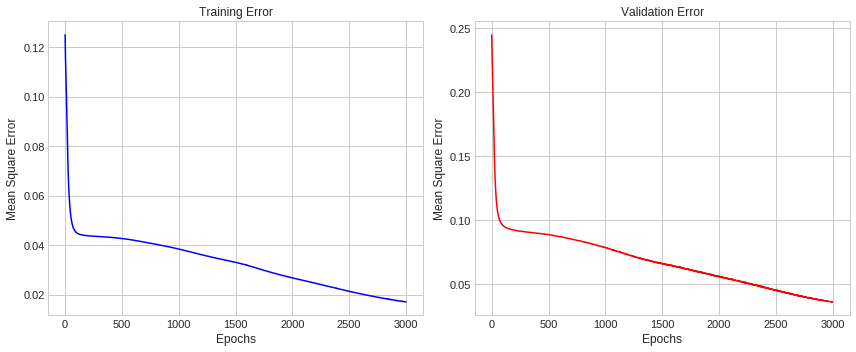

In [257]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(t, c = 'blue')
plt.title('Training Error')
plt.ylabel('Mean Square Error')
plt.xlabel('Epochs')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(v, c = 'red')
plt.title('Validation Error')
plt.ylabel('Mean Square Error')
plt.xlabel('Epochs')
plt.grid('on')

plt.tight_layout()
plt.show()

#### Important Note:
I understand that the number of epochs can further be increased, however my computer is taking a lot of time to process 3000 epochs. So, I have not increased the number of epochs any further but I''m aware about the concept of early stopping. 

In [266]:
#Function to plot decision region
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def plot_decision(X, y, X_val, y_val, model_,title):
    cmap_dark = ListedColormap(['#FF0000', '#0000FF'])
    cmap_light = cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    h = 0.02
    xx,yy = np.meshgrid(np.arange(-50,50),np.arange(-50,50))

    X_ = X
    Y_ = y
    x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
    y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    xx_ = np.c_[xx.ravel(), yy.ravel()]
    Z = model_.predict_proba(xx_)

    Z = Z.reshape(xx.shape)
    
    #Plot training 
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6))
    ax1.pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax1.scatter(X_[:, 0], X_[:, 1], c=Y_, cmap=cmap_dark)
    ax1.set_xlim(xx.min(), xx.max())
    ax1.set_ylim(yy.min(), yy.max())
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    ax1.set_title("Neural Network Decision Boundary and Training Data")
    #Repeat for validation 
    ax2.pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax2.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=cmap_dark)
    ax2.set_xlim(xx.min(), xx.max())
    ax2.set_ylim(yy.min(), yy.max())
    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")
    ax2.set_title("Neural Network Decision Boundary and Validation Data")
    #Create patches for legend 
    red_patch = mpatches.Patch(color='red', label='Class 1')
    blue_patch = mpatches.Patch(color='blue', label='Class 0')
    fig.legend(handles=[red_patch,blue_patch])
    plt.suptitle("Decision Boundary of Neural Network From Scratch", fontsize=20)
    plt.show()

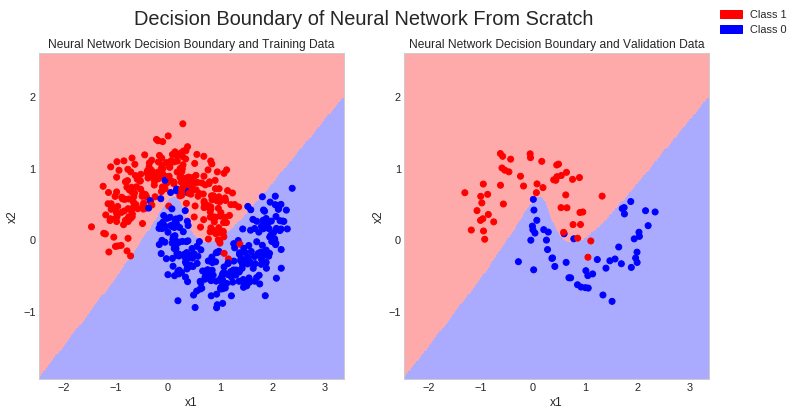

In [267]:
#Plot decision boundary
plot_decision(train[0], train[1], test[0], test[1], nn,"My Neural Network Decision Boundary on Training and Validation Data")

In [268]:
from sklearn.neural_network import MLPClassifier

#Fit sklearn classifier with sigmoid activations, two hidden layers of size 100, 150 max interations, and a constant learning rate of .01. 
mlp_classifier = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=3000, learning_rate_init =.01, activation = 'logistic',random_state=123, solver='sgd', learning_rate='constant',batch_size=1, nesterovs_momentum=False)
mlp_classifier.fit(train[0], train[1].ravel())

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=1, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.01, max_iter=3000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=False, power_t=0.5,
              random_state=123, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

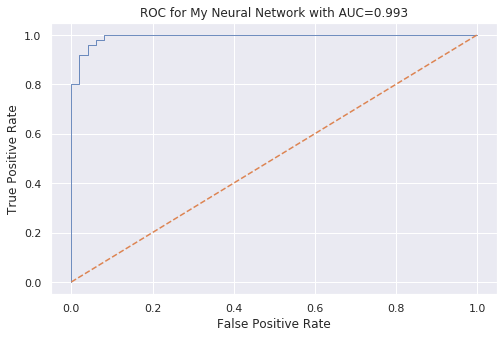

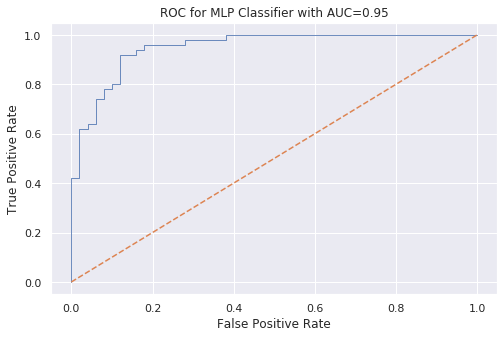

In [271]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

X=test[0]
Y=test[1]

probs1 = nn.predict_proba(X)
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y, probs1)

sns.set()
plt.figure(figsize=(8,5))
plt.plot(false_positive_rate1, true_positive_rate1, lw=1, alpha=0.8, label = 'My Neural Network')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC for My Neural Network with AUC=" + str(round(roc_auc_score(Y,probs1), 3)))
plt.show()


probs2 = mlp_classifier.predict_proba(X)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y, probs2)
sns.set()
plt.figure(figsize=(8,5))
plt.plot(false_positive_rate2, true_positive_rate2, lw=1, alpha=0.8, label = 'MLP Classifier (AUC = {:.2f})'.format(roc_auc_score(Y,probs2)))
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC for MLP Classifier with AUC=" + str(round(roc_auc_score(Y,probs2), 3)))
plt.show()

The MLPClassifier from Sklearn package performs extremely fast and the performance on ROC curve seems to be better for my Neural Network although the difference is not very high.  The AUC for my neural network is 0.99 and for MLP classifier is 0.95. This could be potentially due to the fact that this custom made neural network is designed for a very specific architecture. In contrast, the MLPClassifier is very generic and so it may have better results on a wider dataset. Also, the MLP classifier uses regularization, momentum, dynamic batch sizes for gradient descent which can be a reason of difference in results.  

**(c) Suggest two ways in which you neural network implementation could be improved.**

**ANSWER**

1. Regularization could be added to the cost function
2. Different activation function could be used
3. Dynamic number of layers and nodes could be added
4. Cost function could be dynamically selected